# Canada Refugee Statistics Exploratory Data Analysis¶

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
#function to add labels

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center")

### Load the dataset

In [2]:
# Load the dataset into dataframe
df = pd.read_csv("can-stats-2012-22.csv")

In [3]:
df

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


## Explore the dataset

In [4]:
df.shape
print(f"The shape of the dataframe is {df.shape}")

The shape of the dataframe is (1870, 5)


**The dataset contains 1870 columns and 5 rows.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [25]:
pd.DataFrame(df.isnull().sum(),columns=["Missing Values"])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


In [6]:
No_of_Country = df["Country-of-origin"].nunique()
print (f"The number of countries in the dataset are {No_of_Country}")

The number of countries in the dataset are 184


**REMARKS**

**1. All the data types are appropraite**
**2. There are no missing values in the dataset**


In [7]:
df.sample(5)

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
1364,2019,Tunisia,171,149,320
1608,2021,Jamaica,824,390,1214
1406,2020,Cameroon,964,611,1575
417,2014,India,4292,187,4479
990,2017,El Salvador,1354,629,1983


In [8]:
df.columns
print("The dataset contains 5 columns")
print(df.columns)

The dataset contains 5 columns
Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')


## Checking for duplicate values

In [9]:
df.duplicated().sum()

0

**There are no duplicate values in the dataset**

## EXPLORATORY DATA ANALYSIS

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1870.0,2016.955615,3.167123,2012.0,2014.00,2017.0,2020.00,2022.0
UNHCR-refugees,1870.0,752.438503,2427.738942,0.0,20.00,124.0,563.75,75098.0
Asylum-seekers,1870.0,323.139572,1181.143362,0.0,7.00,36.0,195.25,19765.0
total-count,1870.0,1075.578075,2980.751399,0.0,39.25,187.0,889.75,75294.0


### OBSERVATIONS
1. There is a total of 1870 records.
2. The dataset is between 2012 to 2022.
3. The average number of refugees between 2012 to 2022 is 752.438503
4. The maximum number of refugees accepted within a year is 75098 
5. The average number of asylum seekers between 2012 to 2022 is 323.139572
6. The maximum number of asylum seekers within a year is 19765


In [11]:
# TO CHECK THE CORRELATION COEFFICIENTS
df.corr()

C:\Users\home\AppData\Local\Temp\ipykernel_4912\671898234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


### OBSERVATIONS
1. There is a slightly positive correlation between Number of refugees and asylum seekers, which could mean, the more the number of number of asylum seekers, the more number of refugees.
2. There is a slightly positive correlation between year and asylum seekers, which could mean, the asylum seekers increase with the year.
 

## ANALYSIS QUESTIONS

## Question 1
From which countries has Canada admitted the highest number of refugees?

**From Colombia(108416), followed by China(98586), then Ukraine(88376), Pakistan(74737) and Haiti(70956).**

In [29]:
# REFUGEES BY COUNTRY
df_refugees = (df["UNHCR-refugees"].groupby(by = df["Country-of-origin"])
             .sum().sort_values(ascending = False)[0:5])
df_refugees.reset_index()

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956


In [30]:
percent_df_refugees = df_refugees/df_refugees.sum()*100
percent_df_refugees.reset_index()

,Country-of-origin,UNHCR-refugees
0,Colombia,24.580170
1,China,22.351503
2,Ukraine,20.036683
3,Pakistan,16.944438
4,Haiti,16.087206


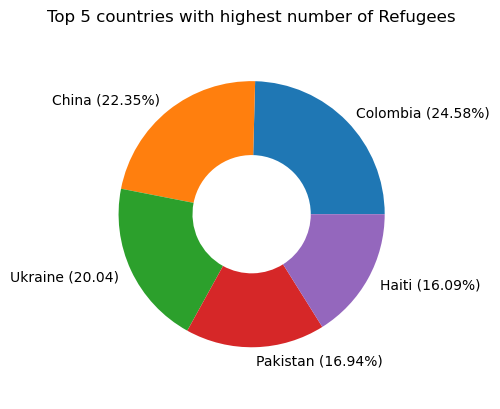

In [31]:
keys = ['Colombia (24.58%)','China (22.35%)','Ukraine (20.04)','Pakistan (16.94%)','Haiti (16.09%)']

plt.pie(df_refugees, labels = keys, radius = 0.9, wedgeprops = dict(width=0.5))
plt.title ('Top 5 countries with highest number of Refugees');

## Question 2 
What are the total number of resettled refugees in Canada per year?

In [33]:
# REFUGEES BY YEAR
df_refugees_year = (df["UNHCR-refugees"].groupby(by = df["Year"])
             .sum().sort_values(ascending = False)).reset_index()
df_refugees_year

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2022,140621
4,2015,135890
5,2021,130125
6,2018,114101
7,2020,109214
8,2017,104768
9,2019,101757


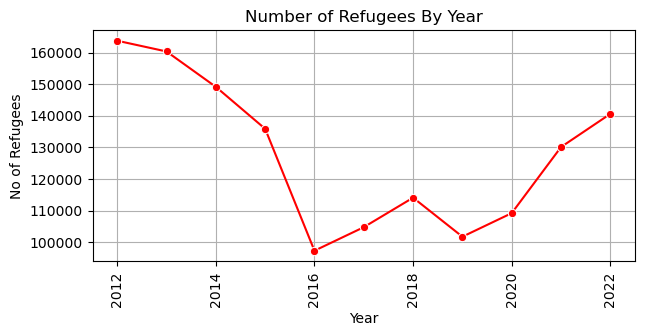

In [53]:
plt.figure(figsize = (7,3))
sns.lineplot (data = df_refugees_year, x = "Year", y = "UNHCR-refugees",marker = "o", color="red" )
plt.title("Number of Refugees By Year")
plt.ylabel("No of Refugees")
plt.grid(visible = True)
plt.xlabel("Year")
plt.xticks (rotation = 90);

## Question 3
 What are the countries of origin for the majority of asylum claims made in Canada?
 
 The highest asylum claim made is from an unknown country, strongly followed by Nigeria, India, Mexico and Haiti

In [42]:
# ASYLUM SEEKERS BY COUNTRY
df_asylum = (df["Asylum-seekers"].groupby(by = df["Country-of-origin"])
             .sum().sort_values(ascending = False)[0:10]).reset_index()
df_asylum

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


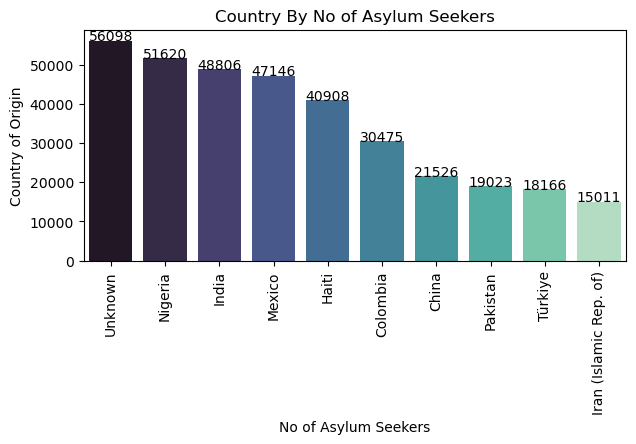

In [46]:
plt.figure(figsize = (7,3))
sns.barplot(data = df_asylum, x = "Country-of-origin", y = "Asylum-seekers", palette = "mako")
plt.ylabel("Country of Origin")
plt.xlabel("No of Asylum Seekers")

addlabels(df_asylum["Country-of-origin"].to_list(),df_asylum["Asylum-seekers"].to_list())
plt.title("Country By No of Asylum Seekers")
plt.xticks (rotation = 90);

## Question 4

**What is the total number of asylum claims made in Canada every year?**


In [14]:
# ASYLUM SEEKERS BY YEAR
df_asylum_year = (df["Asylum-seekers"].groupby(by = df["Year"])
             .sum().sort_values(ascending = False))
df_asylum_year

Year
2022    113066
2019     97017
2020     85352
2018     78766
2021     63143
2017     51859
2012     32647
2016     23946
2013     22145
2015     19631
2014     16699
Name: Asylum-seekers, dtype: int64

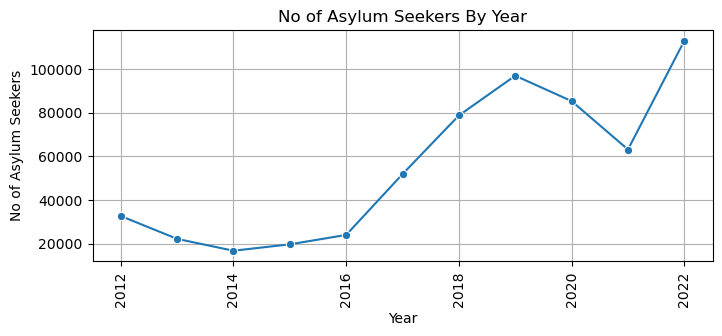

In [50]:
plt.figure(figsize = (8,3))
sns.lineplot (data = df_asylum_year.reset_index(), x = "Year", y = "Asylum-seekers", marker = "o",)
plt.title("No of Asylum Seekers By Year")
plt.ylabel("No of Asylum Seekers")
plt.xlabel("Year")
plt.grid(visible=True)
plt.xticks (rotation = 90);

## Question 5
What are the general trends in refugee and asylum statistics from 2012-2022?
1. There is a slightly positive correlation between Number of refugees and asylum seekers, which could mean, the more the number of number of asylum seekers, the more number of refugees.
2. There is a slightly positive correlation between year and asylum seekers, which could mean, the asylum seekers increase with year (Cell 15 above).


In [21]:
df["Asylum-seekers"].corr(df["UNHCR-refugees"])

0.27826653631264564

In [22]:
df["Year"].corr(df["Asylum-seekers"])

0.14423851840169538

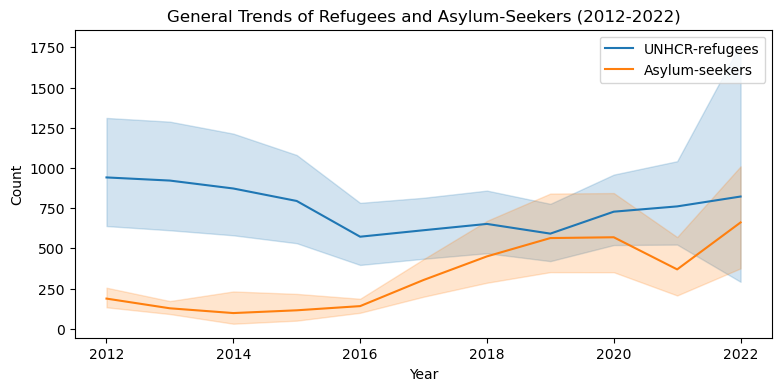

In [23]:
plt.figure(figsize = (9,4))
sns.lineplot(data = df, x="Year", y="UNHCR-refugees", label="UNHCR-refugees")
sns.lineplot(data = df, x="Year", y="Asylum-seekers", label="Asylum-seekers")

plt.title("General Trends of Refugees and Asylum-Seekers (2012-2022)")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend();

In [57]:
top_refugee_countries = df.groupby("Country-of-origin")["total-count"].sum().reset_index().sort_values("total-count", ascending=False)
top_refugee_countries

,Country-of-origin,total-count
35,Colombia,138891
33,China,120112
117,Nigeria,112174
72,Haiti,111864
106,Mexico,98218
...,...,...
88,Kiribati,15
27,Cabo Verde,10
98,Luxembourg,5
18,Bermuda,5


In [62]:
resettled_and_asylum_year=df.groupby("Year")[["UNHCR-refugees", "Asylum-seekers"]].sum().reset_index().sort_values("Year")
resettled_and_asylum_year

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [63]:
melted_data = pd.melt(resettled_and_asylum_year, id_vars = ["Year"], var_name = "Category", value_name = "Count")
melted_data

,Year,Category,Count
0,2012,UNHCR-refugees,163751
1,2013,UNHCR-refugees,160347
2,2014,UNHCR-refugees,149164
3,2015,UNHCR-refugees,135890
4,2016,UNHCR-refugees,97322
5,2017,UNHCR-refugees,104768
6,2018,UNHCR-refugees,114101
7,2019,UNHCR-refugees,101757
8,2020,UNHCR-refugees,109214
9,2021,UNHCR-refugees,130125


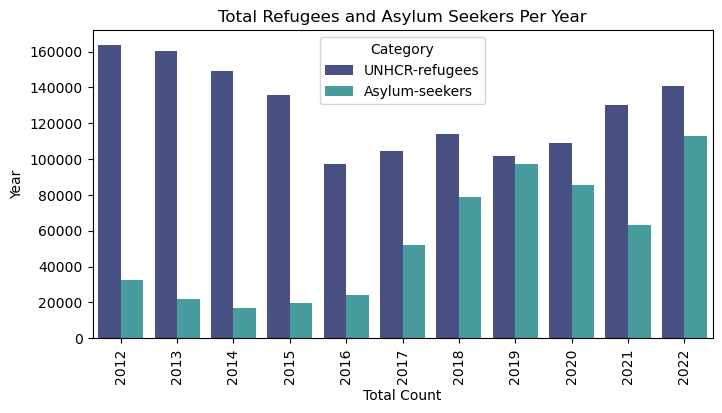

In [69]:
plt.figure(figsize = (8,4))
sns.barplot(data = melted_data, x = "Year", y = "Count", hue= "Category", palette = "mako")
plt.ylabel("Year")
plt.xlabel("Total Count")

plt.title("Total Refugees and Asylum Seekers Per Year")
plt.xticks (rotation = 90);